In [3]:
import os, sys
import numpy as np
import h5py
import tensorly as tl

In [4]:
# Load PCP-cleaned MVBS data
MVBS_path = '/Volumes/wjlee_apl_2/ooi_zplsc_current/'
MVBS_fname = '20150817-20151017_MVBS_PCPcleaned.h5'

import h5py
f = h5py.File(os.path.join(MVBS_path,MVBS_fname),'r')

In [5]:
# Load low-rank data
L = np.array(f['L'])
L_sep = np.array(f['L_sep'])
L_plot = np.array(f['L_plot'])
depth_bin_size = np.array(f['depth_bin_size'])
ping_per_day_mvbs = np.array(f['ping_per_day_mvbs'])
ping_time = np.array(f['ping_time'])
f.close()
depth_bin_num = 37;

In [10]:
L.shape

(62, 15984)

In [8]:
L_sep.shape

(3, 62, 37, 144)

In [9]:
L_plot.shape

(3, 37, 8928)

In [11]:
# Tucker decomposition
from tensorly.decomposition import tucker

In [27]:
sonar_tensor = L_sep[0,:,:,:]
sonar_tensor.shape

(62, 37, 144)

In [28]:
core, factors_tucker = tucker(sonar_tensor, ranks=[1, 20, 50])
print(core.shape)
[print(f.shape) for f in factors_tucker]

(1, 20, 50)
(62, 1)
(37, 20)
(144, 50)


[None, None, None]

In [29]:
full_tensor = tl.tucker_to_tensor(core, factors_tucker)
full_tensor.shape

(62, 37, 144)

In [30]:
import matplotlib.pyplot as plt
% matplotlib inline

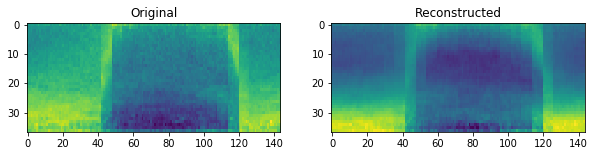

In [51]:
fig,ax = plt.subplots(1,2,figsize=(10,2))
ax[0].imshow(sonar_tensor[50,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor[50,:,:],aspect='auto')
ax[1].set_title('Reconstructed')
plt.show()

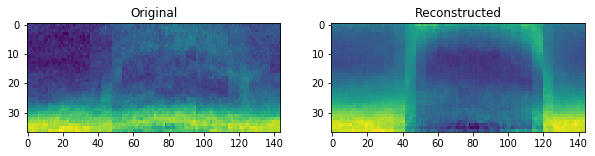

In [52]:
fig,ax = plt.subplots(1,2,figsize=(10,2))
ax[0].imshow(sonar_tensor[10,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor[10,:,:],aspect='auto')
ax[1].set_title('Reconstructed')
plt.show()

### Tucker decomposition: rank_1=3, rank_2=50, rank_3=50

In [40]:
core3, factors_tucker3 = tucker(sonar_tensor, ranks=[3, 20, 50])
print(core3.shape)
[print(f.shape) for f in factors_tucker3]

(3, 20, 50)
(62, 3)
(37, 20)
(144, 50)


[None, None, None]

In [73]:
# Reconstruction using all components
full_tensor3 = tl.tucker_to_tensor(core3, factors_tucker3)

In [74]:
# Prepare core and factors for reconstruction using individual components
core3_comp1 = np.copy(core3[0,:,:])
core3_comp1 = np.expand_dims(core3_comp1,axis=0)
core3_comp2 = np.copy(core3[1,:,:])
core3_comp2 = np.expand_dims(core3_comp2,axis=0)
core3_comp3 = np.copy(core3[2,:,:])
core3_comp3 = np.expand_dims(core3_comp3,axis=0)

In [46]:
factors_tucker3_comp1 = np.copy(factors_tucker3)
factors_tucker3_comp1[0] = factors_tucker3[0][:,0]
factors_tucker3_comp1[0] = np.expand_dims(factors_tucker3_comp1[0],axis=1)
factors_tucker3_comp2 = np.copy(factors_tucker3)
factors_tucker3_comp2[0] = factors_tucker3[0][:,1]
factors_tucker3_comp2[0] = np.expand_dims(factors_tucker3_comp2[0],axis=1)
factors_tucker3_comp3 = np.copy(factors_tucker3)
factors_tucker3_comp3[0] = factors_tucker3[0][:,2]
factors_tucker3_comp3[0] = np.expand_dims(factors_tucker3_comp3[0],axis=1)

In [75]:
# Reconstruction using individual components
full_tensor3_comp1 = tl.tucker_to_tensor(core3_comp1, factors_tucker3_comp1)
full_tensor3_comp2 = tl.tucker_to_tensor(core3_comp2, factors_tucker3_comp2)
full_tensor3_comp3 = tl.tucker_to_tensor(core3_comp1, factors_tucker3_comp3)

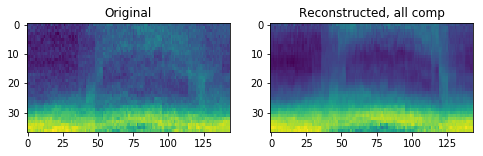

In [68]:
fig,ax = plt.subplots(1,2,figsize=(8,2))
ax[0].imshow(sonar_tensor[10,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor3[10,:,:],aspect='auto')
ax[1].set_title('Reconstructed, all comp')
plt.show()

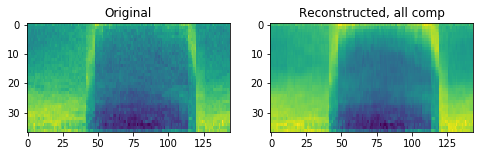

In [69]:
fig,ax = plt.subplots(1,2,figsize=(8,2))
ax[0].imshow(sonar_tensor[50,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor3[50,:,:],aspect='auto')
ax[1].set_title('Reconstructed, all comp')
plt.show()

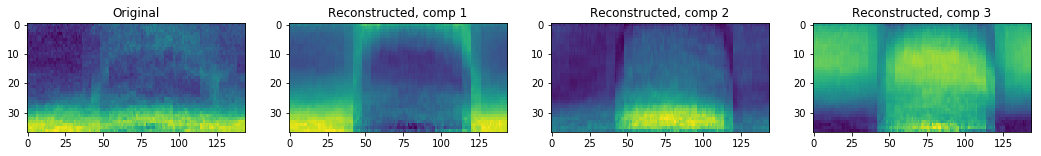

In [71]:
fig,ax = plt.subplots(1,4,figsize=(18,2))
ax[0].imshow(sonar_tensor[10,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor3_comp1[10,:,:],aspect='auto')
ax[1].set_title('Reconstructed, comp 1')
ax[2].imshow(full_tensor3_comp2[10,:,:],aspect='auto')
ax[2].set_title('Reconstructed, comp 2')
ax[3].imshow(full_tensor3_comp3[10,:,:],aspect='auto')
ax[3].set_title('Reconstructed, comp 3')
plt.show()

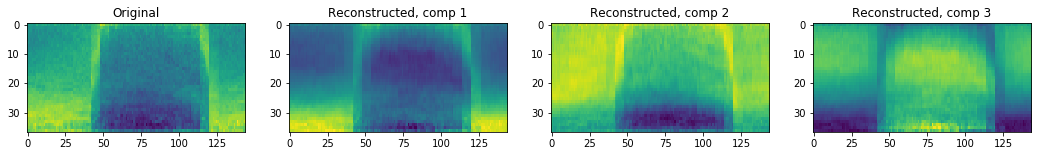

In [72]:
fig,ax = plt.subplots(1,4,figsize=(18,2))
ax[0].imshow(sonar_tensor[50,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor3_comp1[50,:,:],aspect='auto')
ax[1].set_title('Reconstructed, comp 1')
ax[2].imshow(full_tensor3_comp2[50,:,:],aspect='auto')
ax[2].set_title('Reconstructed, comp 2')
ax[3].imshow(full_tensor3_comp3[50,:,:],aspect='auto')
ax[3].set_title('Reconstructed, comp 3')
plt.show()

Text(0.5,1,'Comp 3')

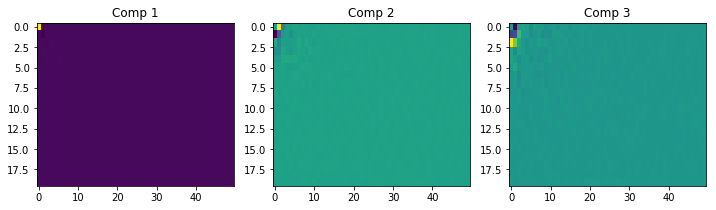

In [81]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].imshow(core3[0,:,:],aspect='auto')
ax[0].set_title('Comp 1')
ax[1].imshow(core3[1,:,:],aspect='auto')
ax[1].set_title('Comp 2')
ax[2].imshow(core3[2,:,:],aspect='auto')
ax[2].set_title('Comp 3')

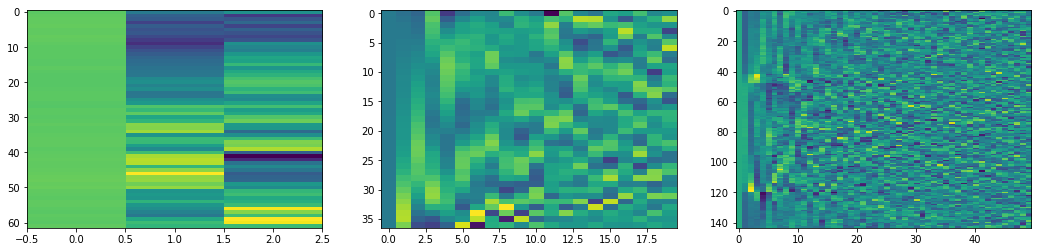

In [79]:
fig = plt.figure(figsize=(18,4))
ax0 = fig.add_subplot(131)
ax0.imshow(factors_tucker3[0],aspect='auto')
ax1 = fig.add_subplot(132)
ax1.imshow(factors_tucker3[1],aspect='auto')
ax2 = fig.add_subplot(133)
ax2.imshow(factors_tucker3[2],aspect='auto')

### Tucker decomposition, rank_1=3, rank_2=5, rank_3=6

In [82]:
core32, factors_tucker32 = tucker(sonar_tensor, ranks=[3, 5, 6])
print(core32.shape)
[print(f.shape) for f in factors_tucker32]

(3, 5, 6)
(62, 3)
(37, 5)
(144, 6)


[None, None, None]

In [83]:
full_tensor32 = tl.tucker_to_tensor(core32, factors_tucker32)

Text(0.5,1,'Comp 3')

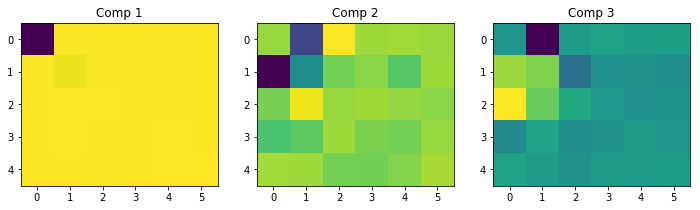

In [84]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].imshow(core32[0,:,:],aspect='auto')
ax[0].set_title('Comp 1')
ax[1].imshow(core32[1,:,:],aspect='auto')
ax[1].set_title('Comp 2')
ax[2].imshow(core32[2,:,:],aspect='auto')
ax[2].set_title('Comp 3')

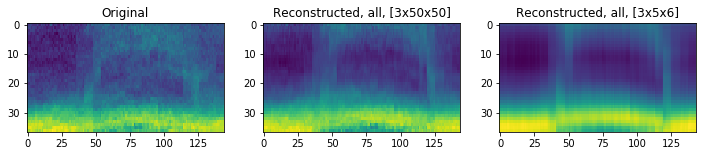

In [89]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(sonar_tensor[10,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor3[10,:,:],aspect='auto')
ax[1].set_title('Reconstructed, all, [3x50x50]')
ax[2].imshow(full_tensor32[10,:,:],aspect='auto')
ax[2].set_title('Reconstructed, all, [3x5x6]')
plt.show()

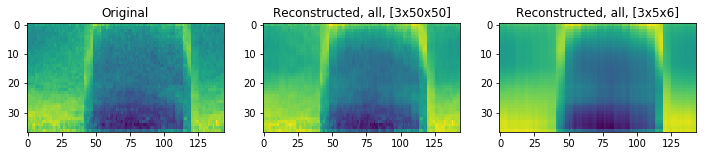

In [90]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(sonar_tensor[50,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor3[50,:,:],aspect='auto')
ax[1].set_title('Reconstructed, all, [3x50x50]')
ax[2].imshow(full_tensor32[50,:,:],aspect='auto')
ax[2].set_title('Reconstructed, all, [3x5x6]')
plt.show()

In [107]:
from tensorly.tenalg import kronecker, khatri_rao

In [108]:
kr23 = kronecker([factors_tucker32[1],factors_tucker32[2]])

In [109]:
kr23.shape

(5328, 30)

In [105]:
factors_tucker32[1].shape

(37, 5)

In [106]:
factors_tucker32[2].shape

(144, 6)

In [111]:
kr23_reshape = kr23.swapaxes(0,1).reshape((-1,37,144))

In [112]:
kr23_reshape.shape

(30, 37, 144)

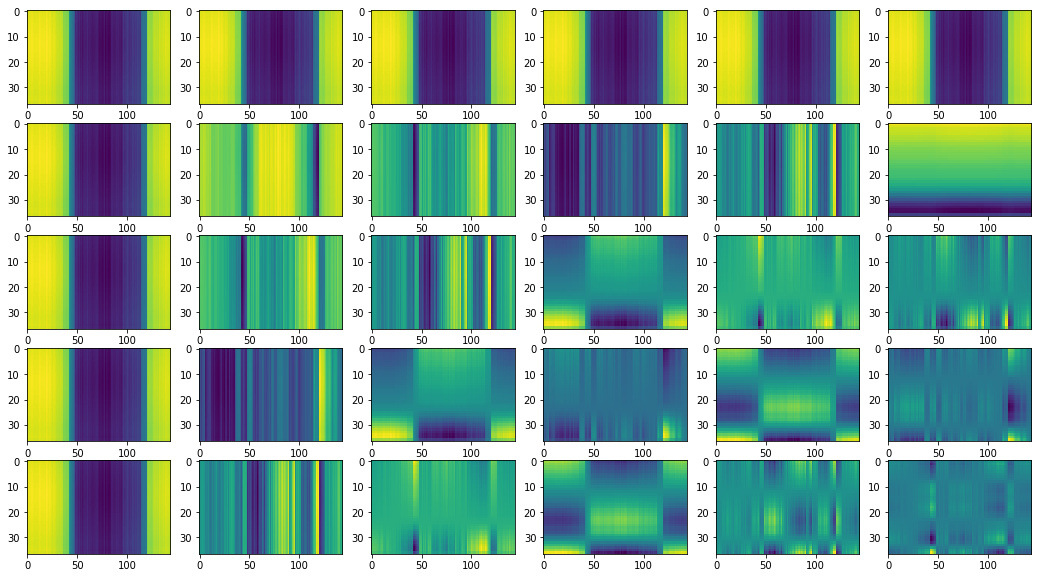

In [117]:
fig,ax = plt.subplots(5,6,figsize=(18,10))
for ix in range(5):
    for iy in range(6):
        ax[ix,iy].imshow(kr23_reshape[1+ix*iy,:,:],aspect='auto')

### Kruskal decomposition

In [118]:
# kruskal decomposition is parafac in tensorly
from tensorly.decomposition import parafac

In [129]:
factors_kruskal_15 = parafac(sonar_tensor, rank = 15)
full_tensor_kruskal_15 = tl.kruskal_to_tensor(factors_kruskal_15)
[print(f.shape) for f in factors_kruskal_15]

(62, 15)
(37, 15)
(144, 15)


[None, None, None]

In [143]:
factors_kruskal_37 = parafac(sonar_tensor, rank = 37)
full_tensor_kruskal_37 = tl.kruskal_to_tensor(factors_kruskal_37)
[print(f.shape) for f in factors_kruskal_37]

/Users/wu-jung/miniconda3/envs/deeplearning/lib/python3.6/site-packages/tensorly/backend/numpy_backend.py:180: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(S)


(62, 37)
(37, 37)
(144, 37)


[None, None, None]

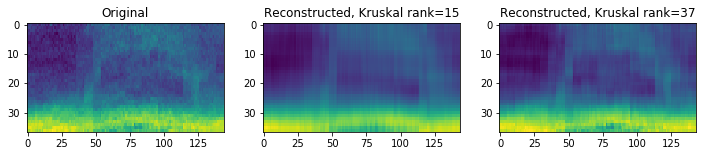

In [144]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(sonar_tensor[10,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor_kruskal_15[10,:,:],aspect='auto')
ax[1].set_title('Reconstructed, Kruskal rank=15')
ax[2].imshow(full_tensor_kruskal_37[10,:,:],aspect='auto')
ax[2].set_title('Reconstructed, Kruskal rank=37')
plt.show()

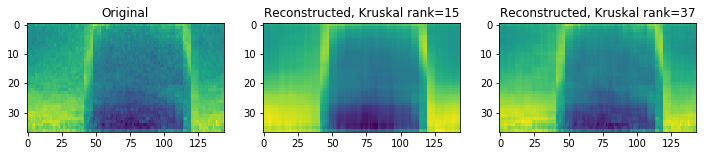

In [145]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(sonar_tensor[50,:,:],aspect='auto')
ax[0].set_title('Original')
ax[1].imshow(full_tensor_kruskal_15[50,:,:],aspect='auto')
ax[1].set_title('Reconstructed, Kruskal rank=15')
ax[2].imshow(full_tensor_kruskal_37[50,:,:],aspect='auto')
ax[2].set_title('Reconstructed, Kruskal rank=37')
plt.show()

In [149]:
#### Factors for rank=15

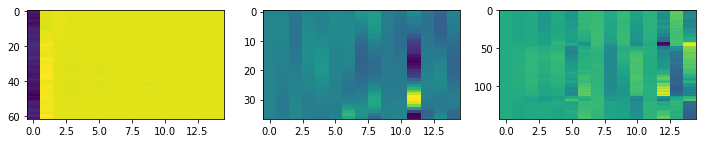

In [150]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(factors_kruskal_15[0],aspect='auto')
ax[1].imshow(factors_kruskal_15[1],aspect='auto')
ax[2].imshow(factors_kruskal_15[2],aspect='auto')
plt.show()

/Users/wu-jung/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


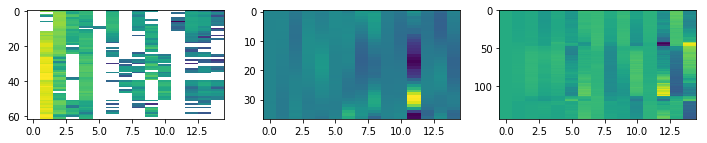

In [151]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(np.log10(factors_kruskal_15[0]),aspect='auto')  # log to see differences
ax[1].imshow(factors_kruskal_15[1],aspect='auto')
ax[2].imshow(factors_kruskal_15[2],aspect='auto')
plt.show()

#### Factors for rank=37

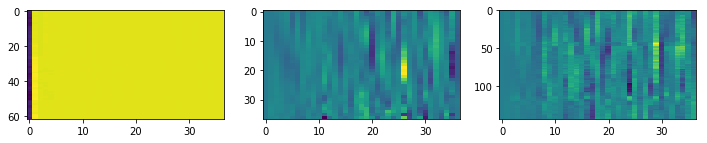

In [146]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(factors_kruskal_37[0],aspect='auto')
ax[1].imshow(factors_kruskal_37[1],aspect='auto')
ax[2].imshow(factors_kruskal_37[2],aspect='auto')
plt.show()

/Users/wu-jung/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


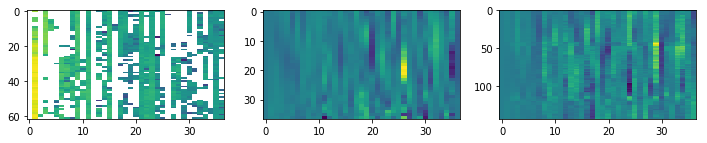

In [147]:
fig,ax = plt.subplots(1,3,figsize=(12,2))
ax[0].imshow(np.log10(factors_kruskal_37[0]),aspect='auto')  # log to see differences
ax[1].imshow(factors_kruskal_37[1],aspect='auto')
ax[2].imshow(factors_kruskal_37[2],aspect='auto')
plt.show()

### Trying to make sense of the factors

#### Rank=15 case

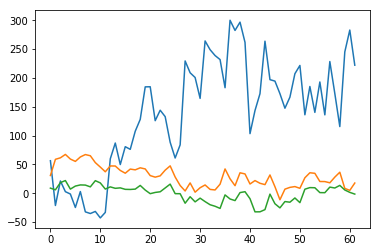

In [159]:
plt.plot(factors_kruskal_15[0][:,1])
plt.plot(factors_kruskal_15[0][:,2])
plt.plot(factors_kruskal_15[0][:,3])

In [161]:
kh = khatri_rao((factors_kruskal_15[1],factors_kruskal_15[2]))

In [169]:
kh_reshape = np.reshape(kh.transpose(),(15,37,144))

In [170]:
kh_reshape.shape

(15, 37, 144)

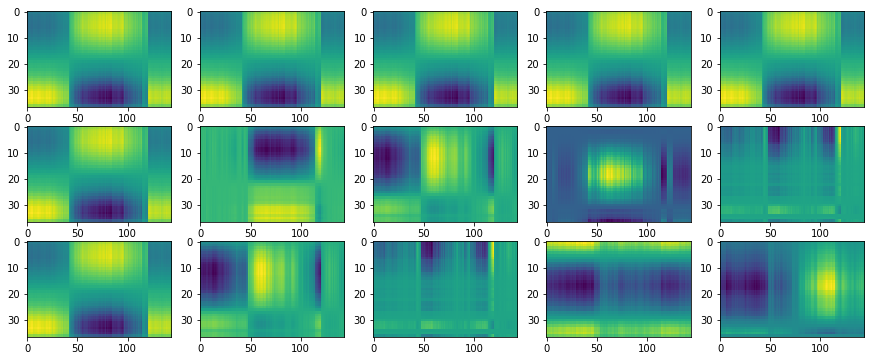

In [181]:
fig,ax = plt.subplots(3,5,figsize=(15,6))
for ix in range(3):
    for iy in range(5):
        ax[ix,iy].imshow(kh_reshape[1+ix*iy,:,:],aspect='auto')

#### Rank = 37 case

In [186]:
kh_37 = khatri_rao((factors_kruskal_37[1],factors_kruskal_37[2]))
kh_reshape_37 = np.reshape(kh_37.transpose(),(37,37,144))
kh_reshape_37.shape

(37, 37, 144)

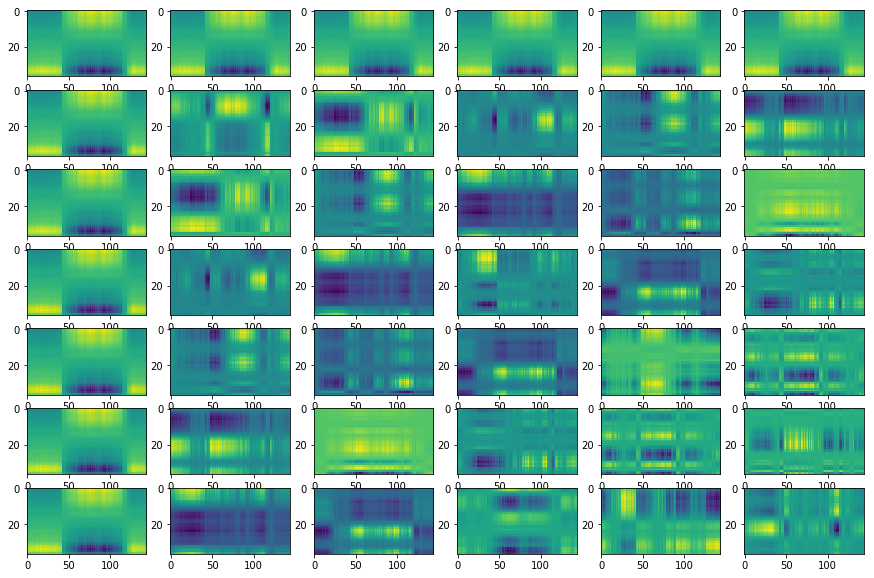

In [191]:
fig,ax = plt.subplots(7,6,figsize=(15,10))
for ix in range(7):
    for iy in range(6):
        if 1+ix*iy<=37:
            ax[ix,iy].imshow(kh_reshape_37[1+ix*iy,:,:],aspect='auto')